In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

data_path = '../raw_data/100k_data.csv'
df_all = pd.read_csv(data_path)
df_sample = df_all.dropna().sample(10000,random_state=0)

In [36]:
df_sample

,Unnamed: 0,id,time_stamp,title,Image_url,upvote_ratio,upvotes
26379,26379,nu260w,1.623034e+09,"Patriot Poms... Macie(all black pom) , pinning...",https://i.redd.it/41g91fvzbr371.png,1.00,5
46598,46598,g3c9su,1.587163e+09,Flora our golden retriever,https://i.redd.it/mj6cwtm1igt41.jpg,0.91,28
58211,58211,cwg55z,1.566968e+09,Does anybody know what kind of dog this is? We...,https://i.redd.it/b0zcwy7of4j31.jpg,0.95,15
13796,13796,sr2itc,1.644704e+09,My American Bulldog puppy,https://i.redd.it/7w5hzqvn6hh81.jpg,1.00,1
17481,17481,r7izrl,1.638484e+09,"Mac, chewer of the stick. Love life by the river.",https://www.reddit.com/gallery/r7izrl,0.91,15
...,...,...,...,...,...,...,...
82204,82204,8gxi8k,1.525420e+09,The best boy,https://i.redd.it/bmq2qni5msv01.jpg,1.00,9
86320,86320,7wljei,1.518271e+09,Hello ladies,https://i.redd.it/jo4y0hrjq0f01.jpg,0.57,1
96940,96940,6msw4d,1.499852e+09,"Swim stop mid hike in Daylesford, Australia",https://i.redd.it/4irysl8it49z.jpg,0.96,73
39127,39127,isegvg,1.600060e+09,Soakin up the rays,https://i.redd.it/edkj765np1n51.jpg,0.88,6


In [37]:
def binary_cat_upvotes(original_df, threshold=50):
    """
    Takes column from df called 'upvotes' and returns df with new 
    column 'cat_upvotes' which is 1 if upvotes is above threshold, and 0 otherwise.
    """
    df = original_df.copy()
    if 'upvotes' not in original_df.columns:
        raise ValueError("df has no column named 'upvotes'")
    def trans(number):
        if number >= threshold:
            return 1
        else:
            return 0
    df['cat_upvotes'] = df['upvotes'].apply(trans)
    return df

In [40]:
binary_cat_upvotes(df_sample, 5)

,Unnamed: 0,id,time_stamp,title,Image_url,upvote_ratio,upvotes,cat_upvotes
26379,26379,nu260w,1.623034e+09,"Patriot Poms... Macie(all black pom) , pinning...",https://i.redd.it/41g91fvzbr371.png,1.00,5,1
46598,46598,g3c9su,1.587163e+09,Flora our golden retriever,https://i.redd.it/mj6cwtm1igt41.jpg,0.91,28,1
58211,58211,cwg55z,1.566968e+09,Does anybody know what kind of dog this is? We...,https://i.redd.it/b0zcwy7of4j31.jpg,0.95,15,1
13796,13796,sr2itc,1.644704e+09,My American Bulldog puppy,https://i.redd.it/7w5hzqvn6hh81.jpg,1.00,1,0
17481,17481,r7izrl,1.638484e+09,"Mac, chewer of the stick. Love life by the river.",https://www.reddit.com/gallery/r7izrl,0.91,15,1
...,...,...,...,...,...,...,...,...
82204,82204,8gxi8k,1.525420e+09,The best boy,https://i.redd.it/bmq2qni5msv01.jpg,1.00,9,1
86320,86320,7wljei,1.518271e+09,Hello ladies,https://i.redd.it/jo4y0hrjq0f01.jpg,0.57,1,0
96940,96940,6msw4d,1.499852e+09,"Swim stop mid hike in Daylesford, Australia",https://i.redd.it/4irysl8it49z.jpg,0.96,73,1
39127,39127,isegvg,1.600060e+09,Soakin up the rays,https://i.redd.it/edkj765np1n51.jpg,0.88,6,1


In [43]:
def multi_cat_upvotes(original_df, int_list=[10,100,1000]):
    """
    Takes column from df and returns df with new 
    column 'cat_upvotes' which is 1 if upvotes is above threshold, and 0 otherwise.
    """
    df = original_df.copy()
    def trans(number):
        for index, integer in enumerate(int_list):
            if number < integer:
                return index
        return len(int_list)
    df['cat_upvotes'] = df['upvotes'].apply(trans)
    return df

In [50]:
multi_cat_upvotes(df_sample,int_list=[0,10,20])

,Unnamed: 0,id,time_stamp,title,Image_url,upvote_ratio,upvotes,cat_upvotes
26379,26379,nu260w,1.623034e+09,"Patriot Poms... Macie(all black pom) , pinning...",https://i.redd.it/41g91fvzbr371.png,1.00,5,1
46598,46598,g3c9su,1.587163e+09,Flora our golden retriever,https://i.redd.it/mj6cwtm1igt41.jpg,0.91,28,3
58211,58211,cwg55z,1.566968e+09,Does anybody know what kind of dog this is? We...,https://i.redd.it/b0zcwy7of4j31.jpg,0.95,15,2
13796,13796,sr2itc,1.644704e+09,My American Bulldog puppy,https://i.redd.it/7w5hzqvn6hh81.jpg,1.00,1,1
17481,17481,r7izrl,1.638484e+09,"Mac, chewer of the stick. Love life by the river.",https://www.reddit.com/gallery/r7izrl,0.91,15,2
...,...,...,...,...,...,...,...,...
82204,82204,8gxi8k,1.525420e+09,The best boy,https://i.redd.it/bmq2qni5msv01.jpg,1.00,9,1
86320,86320,7wljei,1.518271e+09,Hello ladies,https://i.redd.it/jo4y0hrjq0f01.jpg,0.57,1,1
96940,96940,6msw4d,1.499852e+09,"Swim stop mid hike in Daylesford, Australia",https://i.redd.it/4irysl8it49z.jpg,0.96,73,3
39127,39127,isegvg,1.600060e+09,Soakin up the rays,https://i.redd.it/edkj765np1n51.jpg,0.88,6,1


In [15]:
def title(string):
    return len(string)

df_all['len-title'] = df_all.title.apply(title)
df_all

,Unnamed: 0,id,time_stamp,title,Image_url,upvote_ratio,upvotes,len-title
0,0,yvxk3n,1.668520e+09,i'm going to walmart,https://i.redd.it/ncn609p0c40a1.jpg,1.00,1,20
1,1,yvxg9j,1.668519e+09,After suffering from 2 cherry eye look at how ...,https://www.reddit.com/gallery/yvxg9j,1.00,16,74
2,2,yvxdl9,1.668519e+09,Pets please,https://i.imgur.com/Fpvk4kV.jpg,0.98,31,11
3,3,yvx7tg,1.668519e+09,Enjoying some Ice Cream :-),https://www.reddit.com/gallery/yvx7tg,1.00,13,27
4,4,yvx6n8,1.668519e+09,What do you guys think of my grandma’s dog?,https://i.redd.it/6dyplr3h940a1.jpg,1.00,1,43
...,...,...,...,...,...,...,...,...
99261,99261,6djouw,1.495833e+09,Happy happy stick stick! ❤️,NaN,0.99,102,27
99262,99262,6djfys,1.495830e+09,My vicious beast trying to catch his toy.,https://i.imgur.com/6GXLbiA.jpg,0.89,12,41
99263,99263,6dje8h,1.495830e+09,"Kiley, 14 years old and more regal than ever.",https://imgur.com/LkMrNOK,0.99,139,45
99264,99264,6dj6s7,1.495828e+09,My boys Kylo (left) and Peanut (right) love St...,https://i.redd.it/jf9ontpydwzy.jpg,0.87,30,56


In [17]:
df_all["len-title"].max()

300

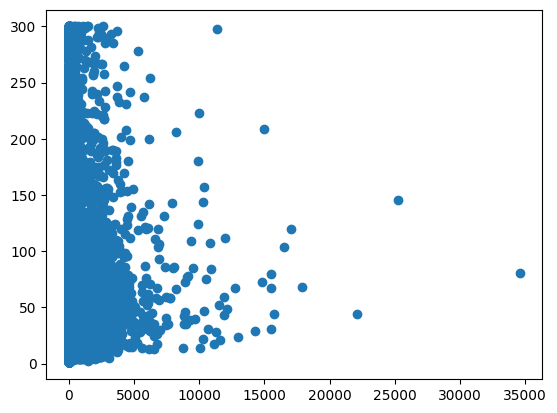

In [9]:
plt.scatter(df_all['upvotes'],df_all['len-title'])

In [19]:


def categorize_upvotes(number):
    try:
        new_num = math.log(number)/2
    except ValueError:
        return 1
    if new_num < 1:
        return 1
    if new_num > 4:
        return 4
    else:
        return round(new_num)
    
df_all['upvote_cat'] = df_all.upvotes.apply(categorize_upvotes)
df_all

,Unnamed: 0,id,time_stamp,title,Image_url,upvote_ratio,upvotes,len-title,upvote_cat
0,0,yvxk3n,1.668520e+09,i'm going to walmart,https://i.redd.it/ncn609p0c40a1.jpg,1.00,1,20,1
1,1,yvxg9j,1.668519e+09,After suffering from 2 cherry eye look at how ...,https://www.reddit.com/gallery/yvxg9j,1.00,16,74,1
2,2,yvxdl9,1.668519e+09,Pets please,https://i.imgur.com/Fpvk4kV.jpg,0.98,31,11,2
3,3,yvx7tg,1.668519e+09,Enjoying some Ice Cream :-),https://www.reddit.com/gallery/yvx7tg,1.00,13,27,1
4,4,yvx6n8,1.668519e+09,What do you guys think of my grandma’s dog?,https://i.redd.it/6dyplr3h940a1.jpg,1.00,1,43,1
...,...,...,...,...,...,...,...,...,...
99261,99261,6djouw,1.495833e+09,Happy happy stick stick! ❤️,NaN,0.99,102,27,2
99262,99262,6djfys,1.495830e+09,My vicious beast trying to catch his toy.,https://i.imgur.com/6GXLbiA.jpg,0.89,12,41,1
99263,99263,6dje8h,1.495830e+09,"Kiley, 14 years old and more regal than ever.",https://imgur.com/LkMrNOK,0.99,139,45,2
99264,99264,6dj6s7,1.495828e+09,My boys Kylo (left) and Peanut (right) love St...,https://i.redd.it/jf9ontpydwzy.jpg,0.87,30,56,2


In [31]:
df_all.describe()

,Unnamed: 0,time_stamp,upvote_ratio,upvotes
count,99266.000000,9.926600e+04,99266.000000,99266.000000
mean,49632.500000,1.582111e+09,0.941778,93.824603
std,28655.770248,4.994898e+07,0.085526,475.845389
min,0.000000,1.495824e+09,0.070000,0.000000
25%,24816.250000,1.538883e+09,0.910000,2.000000
50%,49632.500000,1.581957e+09,0.980000,11.000000
75%,74448.750000,1.625673e+09,1.000000,31.000000
max,99265.000000,1.668520e+09,1.000000,34570.000000


In [26]:
df_all[['upvotes','len-title','upvote_cat']].groupby('upvote_cat').count()

,upvotes,len-title
upvote_cat,,
1,65755,65755
2,25246,25246
3,6206,6206
4,2059,2059
